<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


None

[22:05:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


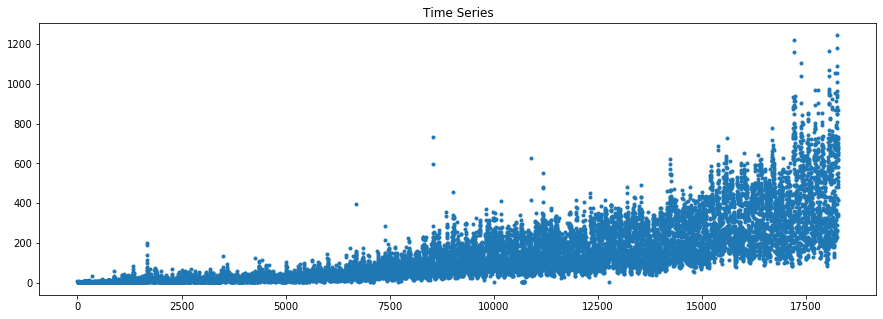

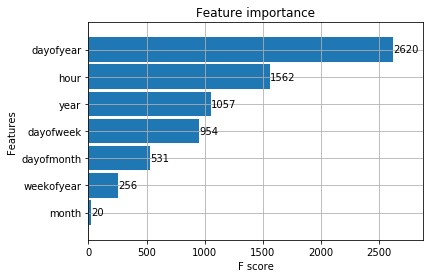

In [4]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import sys
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)

filepath = 'D:/code/Data/time_series_datahack/'

dtrain = pd.read_csv(f'{filepath}train.csv')
dtest = pd.read_csv(f'{filepath}test.csv')

display(dtrain.info())

dtrain['Count'].plot(style='.', figsize=(15,5), title='Time Series')
#plt.show()

dtrain['Datetime'] = pd.to_datetime(dtrain['Datetime'],format='%d-%m-%Y %H:%M')
dtest['Datetime'] = pd.to_datetime(dtest['Datetime'], format='%d-%m-%Y %H:%M')

display(dtrain.info())


def create_features(df):
    """
    Creates time series features from datetime index
    """
    df['hour'] = df['Datetime'].dt.hour
    df['dayofweek'] = df['Datetime'].dt.dayofweek
    df['month'] = df['Datetime'].dt.month
    df['year'] = df['Datetime'].dt.year
    df['dayofyear'] = df['Datetime'].dt.dayofyear
    df['dayofmonth'] = df['Datetime'].dt.day
    df['weekofyear'] = df['Datetime'].dt.weekofyear

    X = df[['hour', 'dayofweek', 'month', 'year',
            'dayofyear', 'dayofmonth', 'weekofyear']]

    return X


X_train = create_features(dtrain)
X_test= create_features(dtest)
y_train = dtrain['Count']


reg = xgb.XGBRegressor(n_estimators=1000)

reg.fit(X_train,y_train)

plot_importance(reg, height=0.9)
plt.show()

predict = reg.predict(X_test)

output = pd.DataFrame({'ID': dtest['ID'], 'Count': predict})

output.to_csv(f'{filepath}submit_jared1.csv',index=False, header =1)